In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def f(x):
    return 3 * x**2 - 4 * x + 5

In [20]:
f(3.0)

20.0

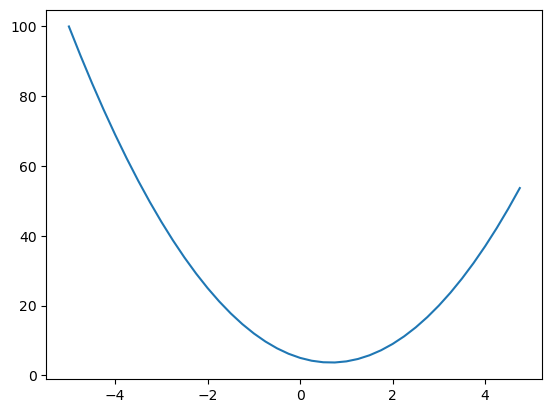

In [21]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

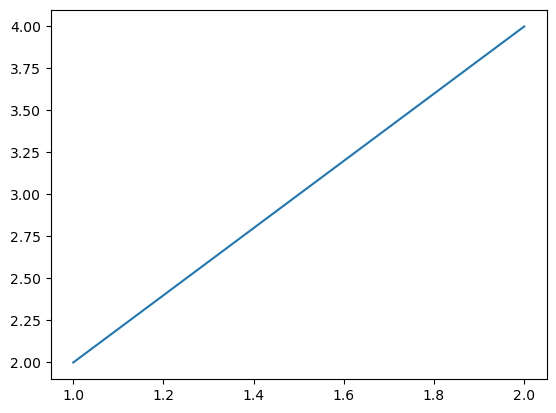

In [22]:
plt.plot([1, 2], [2, 4])

In [23]:
h = 0.001
x = 2 / 3
(f(x + h) - f(x)) / h

0.0029999999995311555

In [24]:
a = 2.0
b = -2.0
c = 10.0
d = a * b + c
print(d)

6.0


In [26]:
h = 0.0001
a = 2.0
b = -2.0
c = 10.0
d = a * b + c
print(d)
a += h
d2 = a * b + c
print(d2, "slope", (d2 - d) / h)

6.0
5.9998 slope -2.0000000000042206


In [54]:
class value:
    def __init__(self, data, _children=(), _op=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __add__(self, other):
        out = value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = value(self.data * other.data, (self, other), "*")
        return out

    def __repr__(self) -> str:
        return f"value(data={self.data})"

In [55]:
a = value(4)
b = value(-2)
c = value(4)
d = a * b + c

In [56]:
print(d._prev)

{value(data=-8), value(data=4)}


In [57]:
from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

ModuleNotFoundError: No module named 'graphviz'